<a href="https://colab.research.google.com/github/patty-gz02/ProcessImagenes/blob/main/Grietas_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Montando entorno de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Ubicacion en la carpeta para la redimension y cambio de nombre
import os
folder_path = '/content/drive/MyDrive/images_redimension'
os.chdir(folder_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/images_redimension'

In [ ]:
#Nombrando las imagenes de la carpeta seleccionada en el paso anterior

file_list = os.listdir()
prefix = 'grieta_'

for i, file_name in enumerate(file_list, start=1):
    file_extension = os.path.splitext(file_name)[1]
    new_file_name = f'{prefix}{i}{file_extension}'
    os.rename(file_name, new_file_name)



In [ ]:
import cv2
import glob

In [ ]:
#PRIMER PASO: Redimensionado de Imágenes

# Tamaño deseado de las imágenes
target_size = (480,320)

# Directorio que contiene las imágenes originales
input_directory = '/content/drive/MyDrive/opencamara'

# Directorio de salida para las imágenes preprocesadas
output_directory = '/content/drive/MyDrive/images_redimension'

# Lista para almacenar las imágenes preprocesadas
preprocessed_images = []

# Obtener la lista de archivos de imagen en el directorio de entrada
image_files = glob.glob(os.path.join(input_directory, '*.png'))

for image_file in image_files:
    # Leer la imagen
    image = cv2.imread(image_file)

    # Comprobar si la imagen se ha leído correctamente
    if image is not None:
        # Redimensionar la imagen al tamaño deseado
        resized_image = cv2.resize(image, target_size)
        preprocessed_images.append(resized_image)

# Guardar las imágenes preprocesadas en el directorio de salida con el mismo nombre que tenían en el directorio original
for image_file, preprocessed_image in zip(image_files, preprocessed_images):
    # Obtener el nombre del archivo sin la ruta completa
    filename = os.path.basename(image_file)

    # Construir la ruta de salida con el mismo nombre que tenía el archivo original
    output_path = os.path.join(output_directory, filename)

    # Guardar la imagen preprocesada con el mismo nombre que tenía el archivo original
    cv2.imwrite(output_path, preprocessed_image)

(320, 480, 3)
[[166 167 166 ... 178 181 183]
 [158 165 173 ... 167 172 176]
 [164 165 165 ... 167 160 155]
 ...
 [150 160 167 ... 193 191 185]
 [134 139 142 ... 179 176 182]
 [139 138 133 ... 174 172 170]]


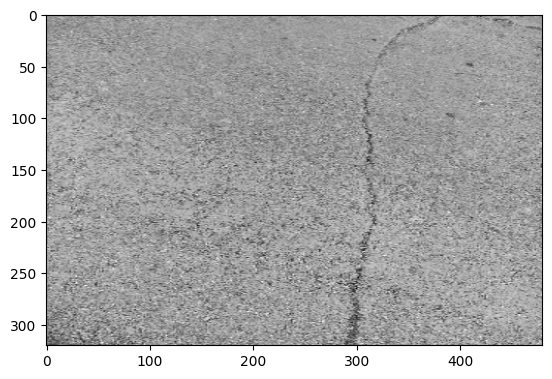

In [ ]:
#SEGUNDO PASO: Propiedades de las imagenes
import skimage.color as skcolor
image = cv2.imread('/content/drive/MyDrive/images_redimension/grieta_593.png')
imageg=(skcolor.rgb2gray(image)*255).astype(np.uint8)
print(image.shape)
image
print(imageg)
plt.imshow(imageg,cmap="gray")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing, binary_opening, binary_dilation

Matriz cuantificada de la imagen:
[[170. 170. 170. 153. 153. ... 170. 170. 170. 187. 187.]
 [153. 170. 170. 170. 170. ... 170. 170. 170. 170. 170.]
 [170. 170. 170. 170. 170. ... 170. 170. 170. 153. 153.]
 [170. 170. 170. 153. 153. ... 170. 170. 153. 153. 170.]
 [170. 170. 170. 153. 153. ... 170. 170. 170. 170. 170.]
 ...
 [136. 153. 153. 136. 136. ... 153. 170. 187. 187. 170.]
 [153. 136. 119. 119. 119. ... 153. 153. 204. 187. 170.]
 [153. 170. 170. 153. 136. ... 170. 170. 187. 187. 187.]
 [136. 136. 153. 136. 119. ... 204. 221. 187. 170. 187.]
 [136. 136. 136. 119. 119. ... 187. 170. 170. 170. 170.]]
No se detectaron líneas en la imagen.


<ipython-input-11-f820db410ac2>:55: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
<ipython-input-11-f820db410ac2>:56: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_std_binary = binary_opening(mean_std_binary, selem=np.ones((3, 3)))
<ipython-input-11-f820db410ac2>:59: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
<ipython-input-11-f820db410ac2>:65: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  dilated_image = binary_dilation(mean_std_binary, selem=np.on

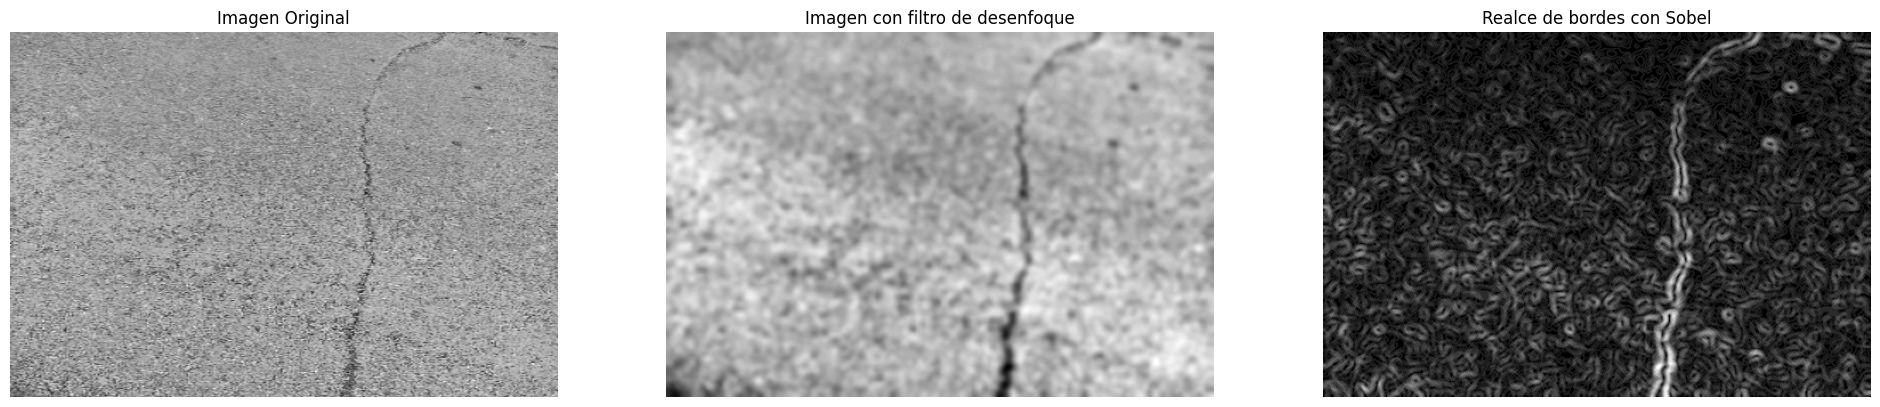

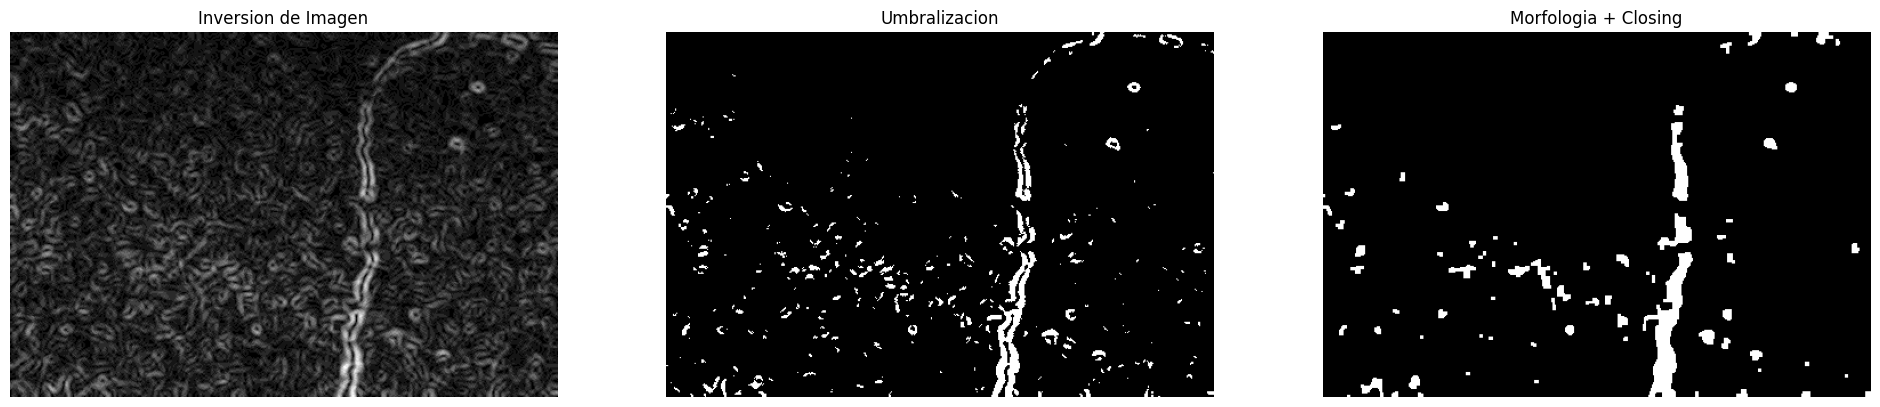

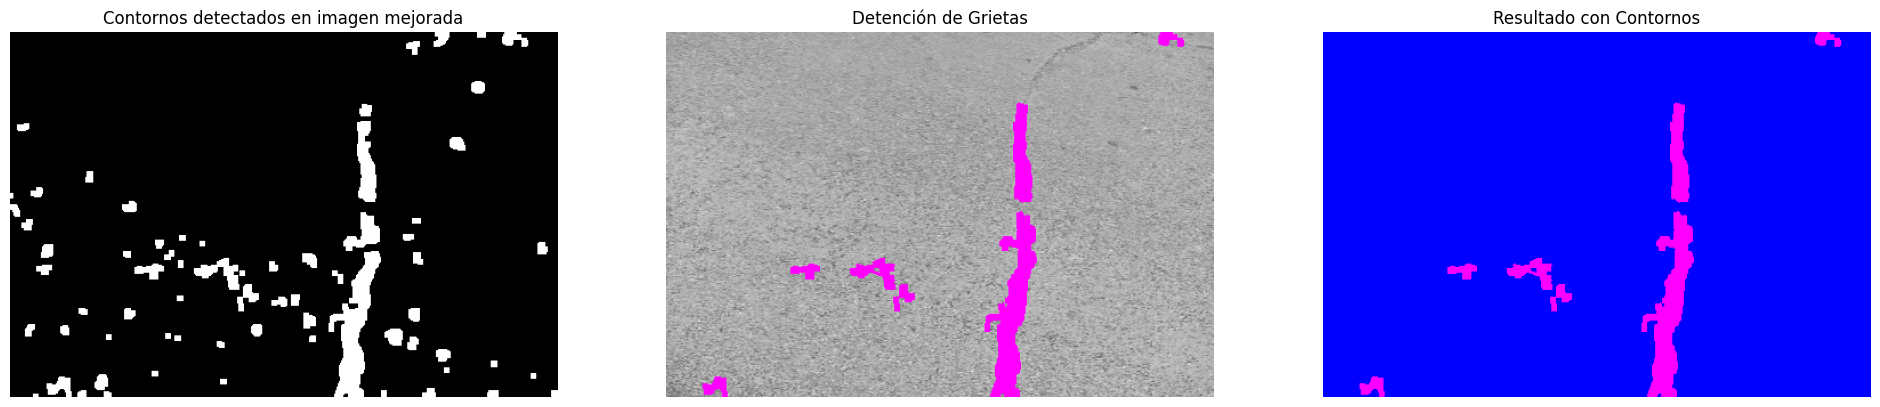

In [ ]:
##MEJORAMIENTO DE IMAGEN Y SEGMENTACION MANUAL DE GRIETAS - MUESTRA

#def process_image(image_path, output_folder):
# Leer la imagen en escala de grises
#image = cv2.imread(image_path, 0)
image = cv2.imread('/content/drive/MyDrive/images_redimension/grieta_593.png', 0)

# Gráfico 1: Mostrar la imagen original en escala de grises
image2 = image

#Mostrar la matriz cuantificada de la imagen
quantized_image = np.round(image / 255.0 * 15) * (255 // 15)
np.set_printoptions(threshold=20, edgeitems=5)
print("Matriz cuantificada de la imagen:")
print(quantized_image)

# Restaurar la configuración de impresión predeterminada para evitar cambios no deseados
np.set_printoptions()

# Aplicar filtro de desenfoque gaussiano
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Gráfico 2: Mostrar la imagen con el filtro de desenfoque aplicado
blurred_image2 = blurred_image

# Realce de bordes utilizando el operador Sobel
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=1)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=1)
gradient_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Gráfico 3: Mostrar la imagen con realce de bordes con operador Sobel
gradient_image2 = gradient_image

# Invertir la imagen para detectar líneas oscuras (grietas)
inverted_image = gradient_image.astype(np.uint8)

# Gráfico 4: Mostrar la imagen binarizada después de aplicar Otsu y las operaciones morfológicas
inverted_image2 = inverted_image

# Umbral utilizando la media y la desviación estándar en la imagen invertida
mean = np.mean(inverted_image)
std = np.std(inverted_image)
mean_std_thresh = mean + 2 * std  # Ajustamos el valor del umbral
mean_std_binary = inverted_image > mean_std_thresh

# Gráfico 5: Mostrar la imagen otsu despues de aplicar umbrales
mean_std_binary2 = mean_std_binary

# Operaciones morfológicas en las imágenes binarias
mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
mean_std_binary = binary_opening(mean_std_binary, selem=np.ones((3, 3)))

# Aplicar el closing para mejorar la detección de la grieta
mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))

# Gráfico 6: Mostrar la imagen mejorada despues de aplicar operaciones morfologicas y closing
mean_std_binary3 = mean_std_binary

# Realizar una dilatación morfológica para unir los contornos cercanos y formar líneas más continuas
dilated_image = binary_dilation(mean_std_binary, selem=np.ones((3, 3)))

# Convertir la imagen dilatada a tipo np.uint8
dilated_image_uint8 = (dilated_image * 255).astype(np.uint8)

# Encontrar contornos en la imagen binarizada dilatada
contours, _ = cv2.findContours(dilated_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Función para filtrar los contornos basados en el área y longitud de perímetro
def filter_contours(contours, area_thresh, perimeter_thresh):
  filtered_contours = []
  for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    if area > area_thresh and perimeter > perimeter_thresh:
      filtered_contours.append(contour)
  return filtered_contours

# Filtrar los contornos
filtered_contours = filter_contours(contours, area_thresh=70, perimeter_thresh=70)

# Dibujar los contornos filtrados en la imagen original para resaltar las líneas de las grietas y rellenarlos
result = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
cv2.drawContours(result, filtered_contours, -1, (255, 0, 255), thickness=-1)  # Usamos thickness=-2 para rellenar los contornos

# Utilizar la transformada de Hough para detectar líneas en la imagen binarizada dilatada
lines = cv2.HoughLinesP(dilated_image_uint8, rho=1, theta=np.pi/180, threshold=90, minLineLength=30, maxLineGap=8)

# Dibujar contornos en el fondo azul (magenta)
blue_bg = np.zeros_like(result)
blue_bg[:, :, 0] = 0  # Canal rojo a 0
blue_bg[:, :, 1] = 0  # Canal verde a 0
blue_bg[:, :, 2] = 255  # Canal azul a 255 (azul fuerte)


if lines is not None:
# Dibujar las líneas detectadas en la imagen original
  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 255), 2)
    cv2.line(blue_bg, (x1, y1), (x2, y2), (255, 0, 255), 2)  # Dibujamos las líneas
  else:
    print("No se detectaron líneas en la imagen.")

contour_image = cv2.drawContours(blue_bg.copy(), filtered_contours, -1, (255, 0, 255), thickness=-1)
# Define una lista para almacenar las cinco imágenes
imagenes_figura = [image2, blurred_image2, gradient_image2]

# Define títulos para las imágenes en la figura
titulos = ['Imagen Original', 'Imagen con filtro de desenfoque',
           'Realce de bordes con Sobel']

# Muestra las cinco imágenes en una cuadrícula antes de las imágenes ya presentes
plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(imagenes_figura[i], cmap='gray')
    plt.title(titulos[i])
    plt.axis('off')

plt.show()

# Define una lista para almacenar las cinco imágenes
imagenes_figura2 = [inverted_image2, mean_std_binary2, mean_std_binary3]

# Define títulos para las imágenes en la figura
titulos2 = ['Inversion de Imagen',
           'Umbralizacion', 'Morfologia + Closing']

# Muestra las cinco imágenes en una cuadrícula antes de las imágenes ya presentes
plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(imagenes_figura2[i], cmap='gray')
    plt.title(titulos2[i])
    plt.axis('off')

plt.show()

# Mostrar las imágenes resultantes
plt.figure(figsize=(24, 6))

plt.subplot(131)
plt.imshow(dilated_image_uint8, cmap='gray')
plt.title('Contornos detectados en imagen mejorada')
plt.axis('off')

plt.subplot(132)
plt.imshow(result, cmap='gray')
plt.title('Detención de Grietas')
plt.axis('off')

plt.subplot(133)
plt.imshow(contour_image, cmap='jet')
plt.title('Resultado con Contornos')
plt.axis('off')

plt.show()

# Ruta de la carpeta que contiene las imágenes
#input_folder = '/content/drive/MyDrive/baches_images'
# Ruta de la carpeta donde se guardarán los resultados
#output_folder = '/content/drive/MyDrive/baches_results'

# Obtener la lista de archivos de imagen en la carpeta de entrada
#image_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]

# Procesar cada imagen en la carpeta de entrada
#for image_file in image_files:
    #image_path = os.path.join(input_folder, image_file)
    #process_image(image_path, output_folder)

Matriz cuantificada de la imagen:
[[153. 187. 170. 153. 153. ... 170. 153. 153. 136. 136.]
 [153. 170. 136. 136. 153. ... 153. 153. 204. 170. 153.]
 [170. 170. 170. 153. 136. ... 119. 136. 153. 153. 136.]
 [204. 187. 170. 119. 119. ... 153. 187. 170. 187. 170.]
 [170. 170. 170. 204. 187. ... 187. 170. 204. 187. 170.]
 ...
 [187. 153. 187. 119. 187. ... 170. 136. 119. 136. 119.]
 [170. 136. 136. 170. 170. ... 187. 136. 170. 170. 187.]
 [153. 119. 170. 136. 119. ... 136. 136. 119. 153. 187.]
 [119. 170. 136. 119. 153. ... 136. 136. 136. 136. 153.]
 [136. 153. 119. 153. 119. ... 119. 119. 119. 119. 136.]]
No se detectaron líneas en la imagen.


<ipython-input-133-063d4a1a43f9>:55: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
<ipython-input-133-063d4a1a43f9>:56: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_std_binary = binary_opening(mean_std_binary, selem=np.ones((3, 3)))
<ipython-input-133-063d4a1a43f9>:59: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
<ipython-input-133-063d4a1a43f9>:65: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  dilated_image = binary_dilation(mean_std_binary, selem=n

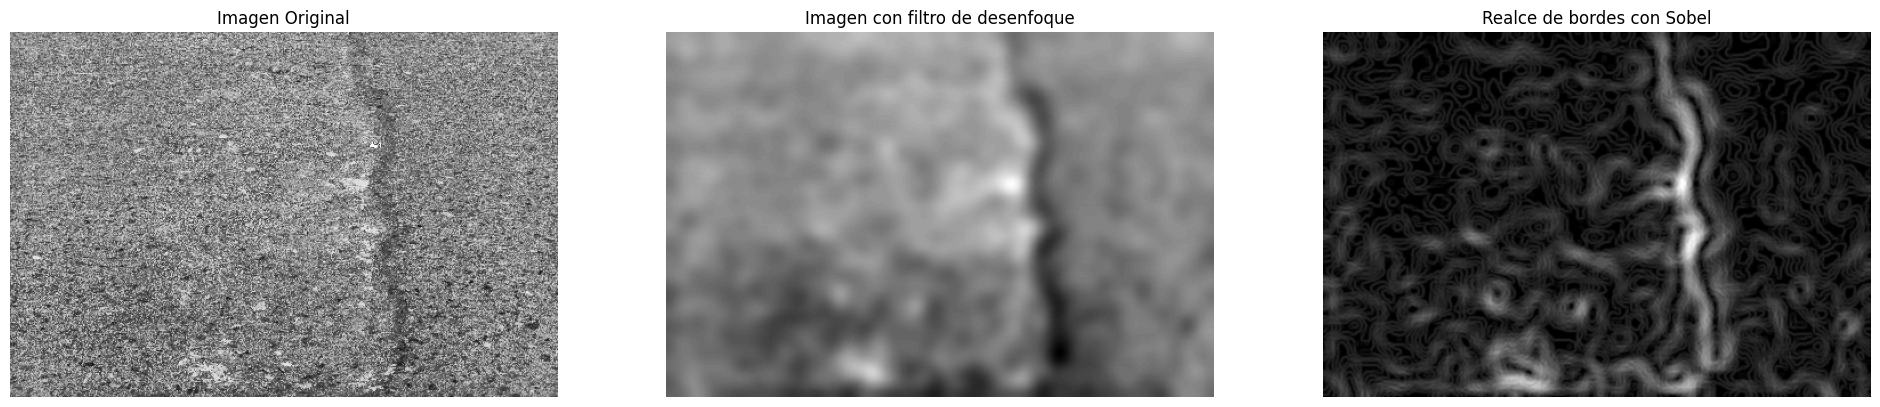

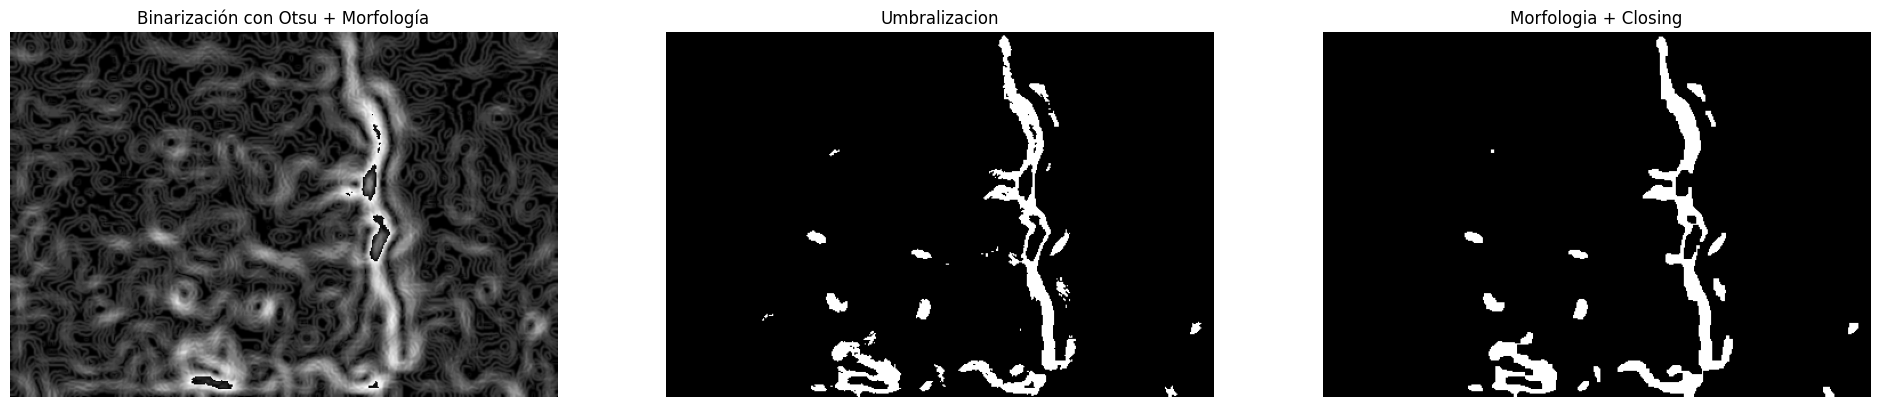

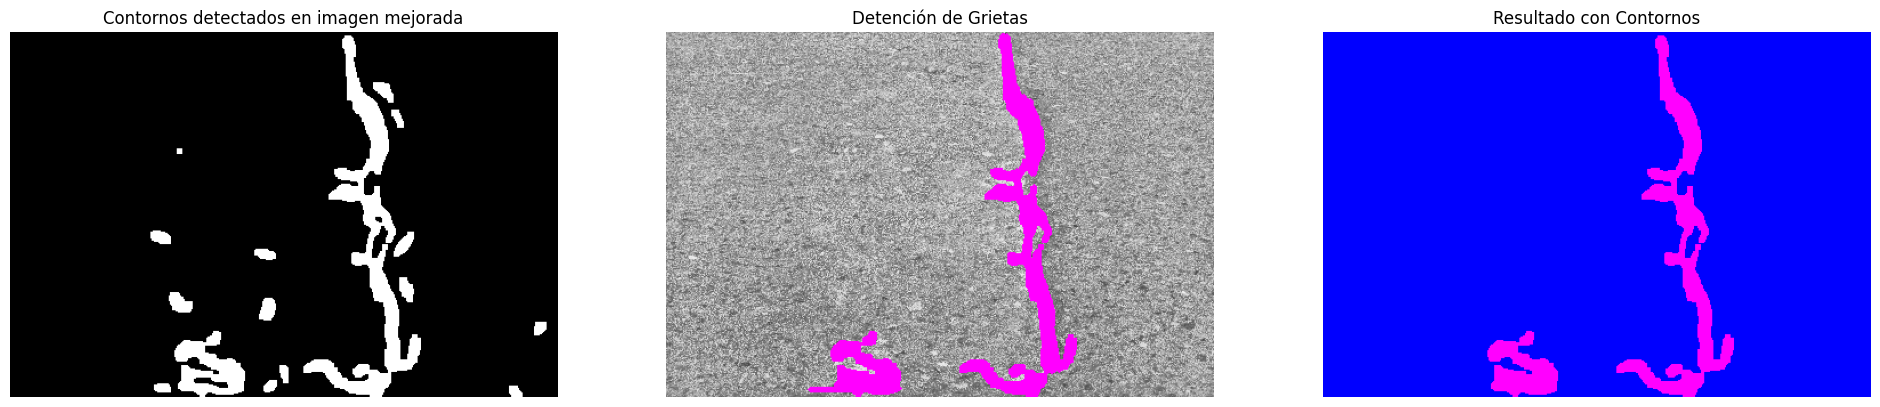

In [ ]:
##MEJORAMIENTO DE IMAGEN Y SEGMENTACION MANUAL DE BACHES - MUESTRA

#def process_image(image_path, output_folder):
# Leer la imagen en escala de grises
#image = cv2.imread(image_path, 0)
image = cv2.imread('/content/drive/MyDrive/baches_segunda_images/bache_93.png', 0)

# Gráfico 1: Mostrar la imagen original en escala de grises
image2 = image

# Mostrar la matriz cuantificada de la imagen
quantized_image = np.round(image / 255.0 * 15) * (255 // 15)
np.set_printoptions(threshold=20, edgeitems=5)
print("Matriz cuantificada de la imagen:")
print(quantized_image)

# Restaurar la configuración de impresión predeterminada para evitar cambios no deseados
np.set_printoptions()

# Aplicar filtro de desenfoque gaussiano
blurred_image = cv2.GaussianBlur(image, (43, 43), 0)

# Gráfico 2: Mostrar la imagen con el filtro de desenfoque aplicado
blurred_image2 = blurred_image

# Realce de bordes utilizando el operador Sobel
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)
gradient_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Gráfico 3: Mostrar la imagen con realce de bordes con operador Sobel
gradient_image2 = gradient_image

# Invertir la imagen para detectar líneas oscuras (grietas)
inverted_image = gradient_image.astype(np.uint8)

# Gráfico 4: Mostrar la imagen binarizada después de aplicar Otsu y las operaciones morfológicas
inverted_image2 = inverted_image

# Umbral utilizando la media y la desviación estándar en la imagen invertida
mean = np.mean(inverted_image)
std = np.std(inverted_image)
mean_std_thresh = mean + 2 * std  # Ajustamos el valor del umbral
mean_std_binary = inverted_image > mean_std_thresh

# Gráfico 5: Mostrar la imagen otsu despues de aplicar umbrales
mean_std_binary2 = mean_std_binary

# Operaciones morfológicas en las imágenes binarias
mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
mean_std_binary = binary_opening(mean_std_binary, selem=np.ones((3, 3)))

# Aplicar el closing para mejorar la detección de la grieta
mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))

# Gráfico 6: Mostrar la imagen mejorada despues de aplicar operaciones morfologicas y closing
mean_std_binary3 = mean_std_binary

# Realizar una dilatación morfológica para unir los contornos cercanos y formar líneas más continuas
dilated_image = binary_dilation(mean_std_binary, selem=np.ones((3, 3)))

# Convertir la imagen dilatada a tipo np.uint8
dilated_image_uint8 = (dilated_image * 255).astype(np.uint8)

# Encontrar contornos en la imagen binarizada dilatada
contours, _ = cv2.findContours(dilated_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Función para filtrar los contornos basados en el área y longitud de perímetro
def filter_contours(contours, area_thresh, perimeter_thresh):
  filtered_contours = []
  for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    if area > area_thresh and perimeter > perimeter_thresh:
      filtered_contours.append(contour)
  return filtered_contours

# Filtrar los contornos
filtered_contours = filter_contours(contours, area_thresh=70, perimeter_thresh=70)

# Dibujar los contornos filtrados en la imagen original para resaltar las líneas de las grietas y rellenarlos
result = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
cv2.drawContours(result, filtered_contours, -1, (255, 0, 255), thickness=-1)  # Usamos thickness=-2 para rellenar los contornos

# Utilizar la transformada de Hough para detectar líneas en la imagen binarizada dilatada
lines = cv2.HoughLinesP(dilated_image_uint8, rho=1, theta=np.pi/180, threshold=90, minLineLength=60, maxLineGap=8)

# Dibujar contornos en el fondo azul (magenta)
blue_bg = np.zeros_like(result)
blue_bg[:, :, 0] = 0  # Canal rojo a 0
blue_bg[:, :, 1] = 0  # Canal verde a 0
blue_bg[:, :, 2] = 255  # Canal azul a 255 (azul fuerte)
contour_image = cv2.drawContours(blue_bg.copy(), filtered_contours, -1, (255, 0, 255), thickness=-1)

if lines is not None:
# Dibujar las líneas detectadas en la imagen original
  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 255), 3)
    cv2.line(blue_bg, (x1, y1), (x2, y2), (255, 0, 255), 3)  # Dibujamos las líneas
  else:
    print("No se detectaron líneas en la imagen.")


# Define una lista para almacenar las cinco imágenes
imagenes_figura = [image2, blurred_image2, gradient_image2]

# Define títulos para las imágenes en la figura
titulos = ['Imagen Original', 'Imagen con filtro de desenfoque',
           'Realce de bordes con Sobel']

# Muestra las cinco imágenes en una cuadrícula antes de las imágenes ya presentes
plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(imagenes_figura[i], cmap='gray')
    plt.title(titulos[i])
    plt.axis('off')

plt.show()

# Define una lista para almacenar las cinco imágenes
imagenes_figura2 = [inverted_image2, mean_std_binary2, mean_std_binary3]

# Define títulos para las imágenes en la figura
titulos2 = ['Binarización con Otsu + Morfología',
           'Umbralizacion', 'Morfologia + Closing']

# Muestra las cinco imágenes en una cuadrícula antes de las imágenes ya presentes
plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(imagenes_figura2[i], cmap='gray')
    plt.title(titulos2[i])
    plt.axis('off')

plt.show()

# Mostrar las imágenes resultantes
plt.figure(figsize=(24, 6))

plt.subplot(131)
plt.imshow(dilated_image_uint8, cmap='gray')
plt.title('Contornos detectados en imagen mejorada')
plt.axis('off')

plt.subplot(132)
plt.imshow(result, cmap='gray')
plt.title('Detención de Grietas')
plt.axis('off')

plt.subplot(133)
plt.imshow(contour_image, cmap='jet')
plt.title('Resultado con Contornos')
plt.axis('off')

plt.show()

# Ruta de la carpeta que contiene las imágenes
#input_folder = '/content/drive/MyDrive/baches_images'
# Ruta de la carpeta donde se guardarán los resultados
#output_folder = '/content/drive/MyDrive/baches_results'

# Obtener la lista de archivos de imagen en la carpeta de entrada
#image_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]

# Procesar cada imagen en la carpeta de entrada
#for image_file in image_files:
    #image_path = os.path.join(input_folder, image_file)
    #process_image(image_path, output_folder)


CODIGO USADO PARA PREPROCESAR Y SEGMENTAR MANUALMENTE LAS GRIETAS (DELGADAS - NORMALES) Y BACHES



In [ ]:
#MEJORAMIENTO DE IMAGEN Y SEGMENTACION MANUAL DE GRIETAS

def process_image(image_path, output_folder):
    # Leer la imagen en escala de grises
    image = cv2.imread(image_path, 0)

    # Aplicar filtro de desenfoque gaussiano
    blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

    # Realce de bordes utilizando el operador Sobel
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=1)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=1)
    gradient_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

    # Invertir la imagen para detectar líneas oscuras (grietas)
    inverted_image = gradient_image.astype(np.uint8)

    # Umbral utilizando la media y la desviación estándar en la imagen invertida
    mean = np.mean(inverted_image)
    std = np.std(inverted_image)
    mean_std_thresh = mean + 2 * std  # Ajustamos el valor del umbral
    mean_std_binary = inverted_image > mean_std_thresh

    # Operaciones morfológicas en las imágenes binarias
    mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
    mean_std_binary = binary_opening(mean_std_binary, selem=np.ones((3, 3)))

    # Aplicar el closing para mejorar la detección de la grieta
    mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))

    # Realizar una dilatación morfológica para unir los contornos cercanos y formar líneas más continuas
    dilated_image = binary_dilation(mean_std_binary, selem=np.ones((3, 3)))

    # Convertir la imagen dilatada a tipo np.uint8
    dilated_image_uint8 = (dilated_image * 255).astype(np.uint8)

    # Encontrar contornos en la imagen binarizada dilatada
    contours, _ = cv2.findContours(dilated_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Función para filtrar los contornos basados en el área y longitud de perímetro
    def filter_contours(contours, area_thresh, perimeter_thresh):
      filtered_contours = []
      for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, closed=True)
        if area > area_thresh and perimeter > perimeter_thresh:
          filtered_contours.append(contour)
      return filtered_contours

    # Filtrar los contornos
    filtered_contours = filter_contours(contours, area_thresh=70, perimeter_thresh=70)

    # Dibujar los contornos filtrados en la imagen original para resaltar las líneas de las grietas y rellenarlos
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(result, filtered_contours, -1, (255, 0, 255), thickness=-1)  # Usamos thickness=-2 para rellenar los contornos

    # Utilizar la transformada de Hough para detectar líneas en la imagen binarizada dilatada
    lines = cv2.HoughLinesP(dilated_image_uint8, rho=1, theta=np.pi/180, threshold=90, minLineLength=30, maxLineGap=8)

    # Dibujar contornos en el fondo azul (magenta)
    blue_bg = np.zeros_like(result)
    blue_bg[:, :, 0] = 255  # Canal rojo a 0
    blue_bg[:, :, 1] = 0  # Canal verde a 0
    blue_bg[:, :, 2] = 0  # Canal azul a 255 (azul fuerte)


    if lines is not None:
    # Dibujar las líneas detectadas en la imagen original
      for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result, (x1, y1), (x2, y2), (255, 0, 255), 2)
        cv2.line(blue_bg, (x1, y1), (x2, y2), (255, 0, 255), 2)  # Dibujamos las líneas
      else:
        print("No se detectaron líneas en la imagen.")

    contour_image = cv2.drawContours(blue_bg.copy(), filtered_contours, -1, (255, 0, 255), thickness=-1)

    # Guardar el resultado en la carpeta de salida con un prefijo y el nombre original
    image_name = os.path.basename(image_path)
    output_name = f"label_{image_name}"
    output_path = os.path.join(output_folder, output_name)
    cv2.imwrite(output_path, contour_image)

# Carpeta de entrada con las imágenes
input_folder = '/content/drive/MyDrive/grietas_imagesII'

# Carpeta de salida para guardar los resultados
output_folder = '/content/drive/MyDrive/grieta_label_II'

# Obtener la lista de archivos en la carpeta de entrada
image_files = os.listdir(input_folder)

# Procesar cada imagen y guardar el resultado en la carpeta de salida
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    process_image(image_path, output_folder)

In [ ]:
#GRIETAS MUY DELGADAS
# Función para filtrar los contornos basados en el área y longitud de perímetro
def filter_contours(contours, area_thresh, perimeter_thresh):
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, closed=True)
        if area > area_thresh and perimeter > perimeter_thresh:
            filtered_contours.append(contour)
    return filtered_contours

# Función para procesar una imagen y guardar el resultado en una carpeta de salida
def process_image(image_path, output_folder):
    image = cv2.imread(image_path, 0)

    # Ecualizar el histograma para mejorar el contraste
    #equalized_image = cv2.equalizeHist(image)

    # Aplicar filtro de desenfoque gaussiano
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Realce de bordes utilizando el operador Sobel
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=1)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=1)
    gradient_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

    # Invertir la imagen para detectar líneas oscuras (grietas)
    inverted_image = gradient_image.astype(np.uint8)

    # Método de Otsu para obtener el umbral adecuado en la imagen invertida
    otsu_thresh = threshold_otsu(inverted_image)
    otsu_binary = inverted_image > otsu_thresh

    # Operaciones morfológicas para eliminar el ruido en las imágenes binarizadas
    otsu_binary = binary_closing(otsu_binary, selem=np.ones((7, 7)))
    otsu_binary = binary_opening(otsu_binary, selem=np.ones((7, 7)))

    # Umbral utilizando la media y la desviación estándar en la imagen invertida
    mean = np.mean(inverted_image)
    std = np.std(inverted_image)
    mean_std_thresh = mean + 1.8 * std  # Ajustamos el valor del umbral
    mean_std_binary = inverted_image > mean_std_thresh

    # Operaciones morfológicas en las imágenes binarias
    mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
    mean_std_binary = binary_opening(mean_std_binary, selem=np.ones((3, 3)))

    # Aplicar el closing para mejorar la detección de la grieta
    mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))

    # Realizar una dilatación morfológica para unir los contornos cercanos y formar líneas más continuas
    dilated_image = binary_dilation(mean_std_binary, selem=np.ones((3, 3)))

    # Convertir la imagen dilatada a tipo np.uint8
    dilated_image_uint8 = (dilated_image * 255).astype(np.uint8)

    # Encontrar contornos en la imagen binarizada dilatada
    contours, _ = cv2.findContours(dilated_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar los contornos
    filtered_contours = filter_contours(contours, area_thresh=70, perimeter_thresh=70)

    # Dibujar los contornos filtrados en la imagen original para resaltar las líneas de las grietas y rellenarlos
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(result, filtered_contours, -1, (255, 0, 255), thickness=-1)  # Usamos thickness=-2 para rellenar los contornos

    # Utilizar la transformada de Hough para detectar líneas en la imagen binarizada dilatada
    lines = cv2.HoughLinesP(dilated_image_uint8, rho=1, theta=np.pi/180, threshold=90, minLineLength=40, maxLineGap=8)

    # Crear una imagen con fondo azul para 'result'
    blue_bg = np.zeros_like(result)
    blue_bg[:, :, 0] = 255  # Canal rojo a 0
    blue_bg[:, :, 1] = 0  # Canal verde a 0
    blue_bg[:, :, 2] = 0  # Canal azul a 255 (azul fuerte)

    # Dibujar las líneas detectadas en la imagen original
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result, (x1, y1), (x2, y2), (255, 0, 255), 3)
        cv2.line(blue_bg, (x1, y1), (x2, y2), (255, 0, 255), 3)  # Dibujamos las líneas

    # Dibujar contornos en el fondo azul (magenta)
    contour_image = cv2.drawContours(blue_bg.copy(), filtered_contours, -1, (255, 0, 255), thickness=-1)

    # Guardar el resultado en la carpeta de salida con un prefijo y el nombre original
    image_name = os.path.basename(image_path)
    output_name = f"label_{image_name}"
    output_path = os.path.join(output_folder, output_name)
    cv2.imwrite(output_path, contour_image)

# Carpeta de entrada con las imágenes
input_folder = '/content/drive/MyDrive/baches_images'

# Carpeta de salida para guardar los resultados
output_folder = '/content/drive/MyDrive/baches_label'

# Obtener la lista de archivos en la carpeta de entrada
image_files = os.listdir(input_folder)

# Procesar cada imagen y guardar el resultado en la carpeta de salida
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    process_image(image_path, output_folder)


<ipython-input-33-276fa0343456>:41: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  otsu_binary = binary_closing(otsu_binary, selem=np.ones((7, 7)))
<ipython-input-33-276fa0343456>:42: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  otsu_binary = binary_opening(otsu_binary, selem=np.ones((7, 7)))
<ipython-input-33-276fa0343456>:51: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
<ipython-input-33-276fa0343456>:52: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_std_binary = binary_opening(mean_std_binary, selem=np.ones((3, 3)))
<ipy

In [ ]:
#MEJORAMIENTO DE IMAGEN Y SEGMENTACION MANUAL DE BACHES

def process_image(image_path, output_folder):
    # Leer la imagen en escala de grises
    image = cv2.imread(image_path, 0)

    # Aplicar filtro de desenfoque gaussiano
    blurred_image = cv2.GaussianBlur(image, (43, 43), 0)

    # Realce de bordes utilizando el operador Sobel
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)
    gradient_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

    # Invertir la imagen para detectar líneas oscuras (grietas)
    inverted_image = gradient_image.astype(np.uint8)

    # Umbral utilizando la media y la desviación estándar en la imagen invertida
    mean = np.mean(inverted_image)
    std = np.std(inverted_image)
    mean_std_thresh = mean + 2 * std  # Ajustamos el valor del umbral
    mean_std_binary = inverted_image > mean_std_thresh

    # Operaciones morfológicas en las imágenes binarias
    mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))
    mean_std_binary = binary_opening(mean_std_binary, selem=np.ones((3, 3)))

    # Aplicar el closing para mejorar la detección de la grieta
    mean_std_binary = binary_closing(mean_std_binary, selem=np.ones((5, 5)))

    # Realizar una dilatación morfológica para unir los contornos cercanos y formar líneas más continuas
    dilated_image = binary_dilation(mean_std_binary, selem=np.ones((3, 3)))

    # Convertir la imagen dilatada a tipo np.uint8
    dilated_image_uint8 = (dilated_image * 255).astype(np.uint8)

    # Encontrar contornos en la imagen binarizada dilatada
    contours, _ = cv2.findContours(dilated_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Función para filtrar los contornos basados en el área y longitud de perímetro
    def filter_contours(contours, area_thresh, perimeter_thresh):
      filtered_contours = []
      for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, closed=True)
        if area > area_thresh and perimeter > perimeter_thresh:
          filtered_contours.append(contour)
      return filtered_contours

    # Filtrar los contornos
    filtered_contours = filter_contours(contours, area_thresh=70, perimeter_thresh=70)

    # Dibujar los contornos filtrados en la imagen original para resaltar las líneas de las grietas y rellenarlos
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(result, filtered_contours, -1, (255, 0, 255), thickness=-1)  # Usamos thickness=-2 para rellenar los contornos

    # Utilizar la transformada de Hough para detectar líneas en la imagen binarizada dilatada
    lines = cv2.HoughLinesP(dilated_image_uint8, rho=1, theta=np.pi/180, threshold=90, minLineLength=60, maxLineGap=8)

    # Dibujar contornos en el fondo azul (magenta)
    blue_bg = np.zeros_like(result)
    blue_bg[:, :, 0] = 255  # Canal rojo a 0
    blue_bg[:, :, 1] = 0  # Canal verde a 0
    blue_bg[:, :, 2] = 0  # Canal azul a 255 (azul fuerte)
    contour_image = cv2.drawContours(blue_bg.copy(), filtered_contours, -1, (255, 0, 255), thickness=-1)

    if lines is not None:
    # Dibujar las líneas detectadas en la imagen original
      for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result, (x1, y1), (x2, y2), (255, 0, 255), 3)
        cv2.line(blue_bg, (x1, y1), (x2, y2), (255, 0, 255), 3)  # Dibujamos las líneas
      else:
        #print("No se detectaron líneas en la imagen.")


# Dibujar contornos en el fondo azul (magenta)
    contour_image = cv2.drawContours(blue_bg.copy(), filtered_contours, -1, (255, 0, 255), thickness=-1)

    # Guardar el resultado en la carpeta de salida con un prefijo y el nombre original
    image_name = os.path.basename(image_path)
    output_name = f"label_{image_name}"
    output_path = os.path.join(output_folder, output_name)
    cv2.imwrite(output_path, contour_image)

# Carpeta de entrada con las imágenes
input_folder = '/content/drive/MyDrive/baches_segunda_images'

# Carpeta de salida para guardar los resultados
output_folder = '/content/drive/MyDrive/baches_segunda_label'

# Obtener la lista de archivos en la carpeta de entrada
image_files = os.listdir(input_folder)

# Procesar cada imagen y guardar el resultado en la carpeta de salida
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    process_image(image_path, output_folder)


OPERACION DE ELIMINACION DE DATA QUE NO CUMPLIA CON PRE-REQUISITOS

In [ ]:
import os

# Ruta de la carpeta donde se encuentran las imágenes
ruta_carpeta_imagenes = '/content/drive/MyDrive/images_redimension'

# Lista de números de imágenes que deben mantenerse
numeros_mantener = [10, 11, 12, 13, 14, 15, 17, 18, 22, 23, 24, 33, 34, 45, 46, 47, 48, 49, 50, 51,
                    58, 59, 60, 70, 71, 72, 73, 75, 77, 79, 84, 86, 89, 92, 100, 106, 109, 110, 112,
                    115, 123, 125, 127, 128, 129, 134, 135, 136, 139, 140, 143, 144, 145, 146, 147,
                    149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161, 163, 167, 169, 173, 186,
                    187, 190, 198, 199, 200, 202, 203, 204, 205, 208, 210, 211, 212, 213, 221, 222,
                    223, 227, 231, 235, 236, 237, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
                    252, 253, 254, 255, 256, 261, 262, 263, 265, 267, 268, 269, 270, 280, 281, 282,
                    286, 287, 288, 289, 293, 301, 303, 304, 305, 307, 308, 310, 311, 313, 314, 315,
                    316, 317, 320, 322, 324, 325, 326, 329, 330, 331, 334, 338, 339, 341, 345, 346,
                    348, 349, 352, 353, 357, 358, 361, 362, 363, 364, 365, 366, 369, 372, 373, 374,
                    375, 377, 378, 379, 380, 381, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393,
                    394, 395, 396, 397, 398, 401, 404, 405, 409, 418, 419, 420, 422, 424, 426, 427,
                    428, 430, 432, 435, 436, 437, 438, 441, 447, 450, 454, 457, 459, 466, 493, 494,
                    495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510,
                    511, 512, 515, 516, 517, 519, 520, 521, 522, 524, 525, 526, 527, 529, 531, 532,
                    533, 534, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549,
                    551, 552, 553, 555, 556, 557, 558, 560, 561, 562, 564, 565, 567, 571, 578, 579,
                    580, 581, 582, 585, 587, 588, 589, 592]

# Obtener la lista de nombres de archivos en la carpeta
archivos = os.listdir(ruta_carpeta_imagenes)

# Recorrer los archivos y eliminar los que no estén en la lista de números a mantener
for archivo in archivos:
    if archivo.startswith("grieta_"):
        numero_archivo = int(archivo[len("grieta_"):-len(".png")])
        if numero_archivo not in numeros_mantener:
            ruta_completa = os.path.join(ruta_carpeta_imagenes, archivo)
            os.remove(ruta_completa)
            print(f"Imagen eliminada: {archivo}")


Imagen eliminada: grieta_400.png
Imagen eliminada: grieta_407.png
Imagen eliminada: grieta_406.png
Imagen eliminada: grieta_408.png
Imagen eliminada: grieta_403.png
Imagen eliminada: grieta_402.png
Imagen eliminada: grieta_410.png
Imagen eliminada: grieta_411.png
Imagen eliminada: grieta_414.png
Imagen eliminada: grieta_412.png
Imagen eliminada: grieta_413.png
Imagen eliminada: grieta_415.png
Imagen eliminada: grieta_417.png
Imagen eliminada: grieta_416.png
Imagen eliminada: grieta_421.png
Imagen eliminada: grieta_423.png
Imagen eliminada: grieta_425.png
Imagen eliminada: grieta_429.png
Imagen eliminada: grieta_431.png
Imagen eliminada: grieta_433.png
Imagen eliminada: grieta_434.png
Imagen eliminada: grieta_439.png
Imagen eliminada: grieta_443.png
Imagen eliminada: grieta_440.png
Imagen eliminada: grieta_442.png
Imagen eliminada: grieta_444.png
Imagen eliminada: grieta_445.png
Imagen eliminada: grieta_446.png
Imagen eliminada: grieta_448.png
Imagen eliminada: grieta_449.png
Imagen eli

In [ ]:
# Ruta de la carpeta donde se encuentran las imágenes
ruta_carpeta_imagenes = '/content/drive/MyDrive/baches_images'

# Lista de números de imágenes que deben mantenerse
numeros_mantener = [1, 2, 8, 10, 12, 13, 17, 18, 29, 30, 31, 39, 40, 42, 43, 50, 51, 52, 60, 61,
                    62, 76, 79, 89, 97, 98, 99, 101, 104, 109, 112, 113, 114, 115, 118, 125, 127,
                    128, 130, 136, 137, 144, 152, 153, 156, 165, 174, 175, 176, 177, 180, 182, 184,
                    186, 188, 192, 199, 200, 206, 208, 210, 211, 216, 217, 218, 219, 221, 223, 225,
                    226, 227, 229, 230, 231, 232, 235, 240, 243, 244, 245, 246, 249, 253, 261, 267,
                    275, 279, 280, 281, 282, 285, 286, 287, 288, 289, 293, 294, 295, 297, 300, 308,
                    312, 313, 318, 319, 320, 324, 326, 328, 329, 330, 331, 333, 338, 339, 340, 348,
                    349, 350, 358, 374, 375, 377, 380, 381, 386, 387, 389, 391, 392, 401, 402, 403,
                    406, 408]

# Obtener la lista de nombres de archivos en la carpeta
archivos = os.listdir(ruta_carpeta_imagenes)

# Variables para contar las imágenes eliminadas y las que se mantienen
imagenes_eliminadas = 0
imagenes_mantener = 0

# Recorrer los archivos y eliminar los que no estén en la lista de números a mantener
for archivo in archivos:
    if archivo.startswith("bache_"):
        numero_archivo = int(archivo[len("bache_"):-len(".png")])
        if numero_archivo not in numeros_mantener:
            ruta_completa = os.path.join(ruta_carpeta_imagenes, archivo)
            os.remove(ruta_completa)
            imagenes_eliminadas += 1
            print(f"Imagen eliminada: {archivo}")
        else:
            imagenes_mantener += 1

print(f"Total de imágenes eliminadas: {imagenes_eliminadas}")
print(f"Total de imágenes que se mantienen: {imagenes_mantener}")


Imagen eliminada: bache_3.png
Imagen eliminada: bache_4.png
Imagen eliminada: bache_5.png
Imagen eliminada: bache_6.png
Imagen eliminada: bache_7.png
Imagen eliminada: bache_9.png
Imagen eliminada: bache_11.png
Imagen eliminada: bache_14.png
Imagen eliminada: bache_15.png
Imagen eliminada: bache_16.png
Imagen eliminada: bache_19.png
Imagen eliminada: bache_20.png
Imagen eliminada: bache_21.png
Imagen eliminada: bache_22.png
Imagen eliminada: bache_23.png
Imagen eliminada: bache_24.png
Imagen eliminada: bache_25.png
Imagen eliminada: bache_26.png
Imagen eliminada: bache_27.png
Imagen eliminada: bache_28.png
Imagen eliminada: bache_32.png
Imagen eliminada: bache_33.png
Imagen eliminada: bache_34.png
Imagen eliminada: bache_35.png
Imagen eliminada: bache_36.png
Imagen eliminada: bache_37.png
Imagen eliminada: bache_38.png
Imagen eliminada: bache_41.png
Imagen eliminada: bache_44.png
Imagen eliminada: bache_45.png
Imagen eliminada: bache_46.png
Imagen eliminada: bache_47.png
Imagen elimina